In [49]:
import pandas as pd

In [51]:
df=pd.read_csv('online.csv')

In [53]:
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [7]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [9]:

df.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


In [19]:
## data preprocessing

In [25]:
transactions= df.iloc[:,0].apply(lambda x:x.split(',')) # Convert the dataset into a list of transactions (splitting by comma)

In [27]:
transactions

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 7500, dtype: object

In [29]:
transactions.head() # Display the first few transactions to verify the transformation

0                           [burgers, meatballs, eggs]
1                                            [chutney]
2                                    [turkey, avocado]
3    [mineral water, milk, energy bar, whole wheat ...
4                                     [low fat yogurt]
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, dtype: object

In [31]:
## Association Rule Mining

In [39]:
!pip install mlxtend

In [41]:
from mlxtend.preprocessing import TransactionEncoder

In [43]:
from mlxtend.frequent_patterns import association_rules,apriori

In [45]:
TE=TransactionEncoder() # Convert transactions into a one-hot encoded DataFrame

In [47]:
TE

TransactionEncoder()

In [55]:
TE_ary=TE.fit(transactions).transform(transactions)

In [57]:
TE_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [59]:
df_encoded=pd.DataFrame(TE_ary,columns=TE.columns_)

In [63]:
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# Apply the Apriori algorithm with a minimum support threshold

frequent_itemsets=apriori(df_encoded,min_support=0.01,use_colnames=True)

In [67]:
frequent_itemsets

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
254,0.011067,"(mineral water, milk, ground beef)"
255,0.017067,"(spaghetti, mineral water, ground beef)"
256,0.015733,"(spaghetti, mineral water, milk)"
257,0.010267,"(olive oil, mineral water, spaghetti)"


In [69]:
# Generate association rules with a minimum confidence level


rules=association_rules(frequent_itemsets,min_threshold=0.02,metric="confidence")

In [73]:
rules   ###Display the generated rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680,0.407144
2,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
3,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,0.002777,1.018920,0.194639
...,...,...,...,...,...,...,...,...,...,...
431,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,0.005462,1.397744,0.488682
432,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163,0.504751
433,(spaghetti),"(mineral water, pancakes)",0.174133,0.033733,0.011467,0.065850,1.952073,0.005593,1.034381,0.590560
434,(mineral water),"(spaghetti, pancakes)",0.238267,0.025200,0.011467,0.048125,1.909736,0.005462,1.024084,0.625373


In [76]:
##Analysis and Interpretation

In [82]:
import warnings
warnings.filterwarnings('ignore')




In [84]:
# Display the top 10 rules sorted by highest lift
top_lift_rules = rules.sort_values(by="lift", ascending=False).head(10)

In [86]:
top_lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
242,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,0.732423
243,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,0.011139,1.135402,0.772060
417,(ground beef),"(spaghetti, mineral water)",0.098267,0.059733,0.017067,0.173677,2.907540,0.011197,1.137893,0.727562
412,"(spaghetti, mineral water)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,0.011197,1.262427,0.697745
427,(olive oil),"(spaghetti, mineral water)",0.065733,0.059733,0.010267,0.156187,2.614731,0.006340,1.114306,0.661001
426,"(spaghetti, mineral water)",(olive oil),0.059733,0.065733,0.010267,0.171875,2.614731,0.006340,1.128171,0.656783
218,(tomatoes),(frozen vegetables),0.068400,0.095333,0.016133,0.235867,2.474134,0.009613,1.183913,0.639564
219,(frozen vegetables),(tomatoes),0.095333,0.068400,0.016133,0.169231,2.474134,0.009613,1.121370,0.658605
214,(shrimp),(frozen vegetables),0.071333,0.095333,0.016667,0.233645,2.450820,0.009866,1.180480,0.637444
215,(frozen vegetables),(shrimp),0.095333,0.071333,0.016667,0.174825,2.450820,0.009866,1.125418,0.654355


In [88]:
top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
242,(herb & pepper),(ground beef),0.016000,0.323450,3.291555
243,(ground beef),(herb & pepper),0.016000,0.162822,3.291555
417,(ground beef),"(spaghetti, mineral water)",0.017067,0.173677,2.907540
412,"(spaghetti, mineral water)",(ground beef),0.017067,0.285714,2.907540
427,(olive oil),"(spaghetti, mineral water)",0.010267,0.156187,2.614731
426,"(spaghetti, mineral water)",(olive oil),0.010267,0.171875,2.614731
218,(tomatoes),(frozen vegetables),0.016133,0.235867,2.474134
219,(frozen vegetables),(tomatoes),0.016133,0.169231,2.474134
214,(shrimp),(frozen vegetables),0.016667,0.233645,2.450820
215,(frozen vegetables),(shrimp),0.016667,0.174825,2.450820


In [90]:
# Display the top 10 rules sorted by highest confidence
top_confidence_rules = rules.sort_values(by="confidence", ascending=False).head(10)

In [92]:
top_confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
372,"(eggs, ground beef)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
408,"(milk, ground beef)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177
348,"(chocolate, ground beef)",(mineral water),0.023067,0.238267,0.010933,0.473988,1.989319,0.005437,1.448130,0.509058
396,"(frozen vegetables, milk)",(mineral water),0.023600,0.238267,0.011067,0.468927,1.968075,0.005444,1.434328,0.503778
300,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458
431,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,0.005462,1.397744,0.488682
425,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,0.004802,1.379138,0.478747
419,"(spaghetti, milk)",(mineral water),0.035467,0.238267,0.015733,0.443609,1.861817,0.007283,1.369061,0.479911
354,"(chocolate, milk)",(mineral water),0.032133,0.238267,0.014000,0.435685,1.828559,0.006344,1.349836,0.468165
413,"(spaghetti, ground beef)",(mineral water),0.039200,0.238267,0.017067,0.435374,1.827256,0.007727,1.349094,0.471202


In [94]:
top_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
372,"(eggs, ground beef)",(mineral water),0.010133,0.506667,2.126469
408,"(milk, ground beef)",(mineral water),0.011067,0.503030,2.111207
348,"(chocolate, ground beef)",(mineral water),0.010933,0.473988,1.989319
396,"(frozen vegetables, milk)",(mineral water),0.011067,0.468927,1.968075
300,(soup),(mineral water),0.023067,0.456464,1.915771
431,"(spaghetti, pancakes)",(mineral water),0.011467,0.455026,1.909736
425,"(olive oil, spaghetti)",(mineral water),0.010267,0.447674,1.878880
419,"(spaghetti, milk)",(mineral water),0.015733,0.443609,1.861817
354,"(chocolate, milk)",(mineral water),0.014000,0.435685,1.828559
413,"(spaghetti, ground beef)",(mineral water),0.017067,0.435374,1.827256


In [96]:
# Find rules with both high lift and high confidence (e.g., lift > 2, confidence > 0.5)
high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]

In [98]:
high_quality_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
372,"(eggs, ground beef)",(mineral water),0.020,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
408,"(milk, ground beef)",(mineral water),0.022,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177


In [101]:
high_quality_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
372,"(eggs, ground beef)",(mineral water),0.010133,0.506667,2.126469
408,"(milk, ground beef)",(mineral water),0.011067,0.503030,2.111207


In [103]:
# Analyze specific items (e.g., find rules where 'mineral water' is involved)
mineral_water_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in str(x)) | rules['consequents'].apply(lambda x: 'mineral water' in str(x))]


In [105]:
mineral_water_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680,0.407144
18,(mineral water),(burgers),0.238267,0.087200,0.024400,0.102406,1.174384,0.003623,1.016941,0.194936
19,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,0.003623,1.057693,0.162675
38,(mineral water),(cake),0.238267,0.081067,0.027467,0.115277,1.422002,0.008151,1.038668,0.389593
...,...,...,...,...,...,...,...,...,...,...
431,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,0.005462,1.397744,0.488682
432,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163,0.504751
433,(spaghetti),"(mineral water, pancakes)",0.174133,0.033733,0.011467,0.065850,1.952073,0.005593,1.034381,0.590560
434,(mineral water),"(spaghetti, pancakes)",0.238267,0.025200,0.011467,0.048125,1.909736,0.005462,1.024084,0.625373


In [107]:
mineral_water_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(avocado),(mineral water),0.011467,0.345382,1.449559
1,(mineral water),(avocado),0.011467,0.048125,1.449559
18,(mineral water),(burgers),0.024400,0.102406,1.174384
19,(burgers),(mineral water),0.024400,0.279817,1.174384
38,(mineral water),(cake),0.027467,0.115277,1.422002
...,...,...,...,...,...
431,"(spaghetti, pancakes)",(mineral water),0.011467,0.455026,1.909736
432,"(mineral water, pancakes)",(spaghetti),0.011467,0.339921,1.952073
433,(spaghetti),"(mineral water, pancakes)",0.011467,0.065850,1.952073
434,(mineral water),"(spaghetti, pancakes)",0.011467,0.048125,1.909736


In [109]:
#Visualizing Association rules using a scatter plot

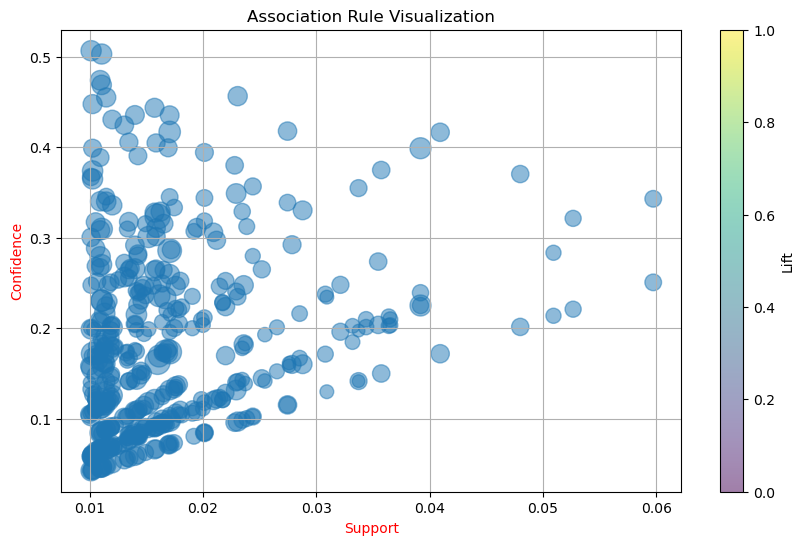

In [111]:
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, alpha=0.5)
plt.xlabel('Support',color='red')
plt.ylabel('Confidence',color='red')
plt.title('Association Rule Visualization',color='black')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()


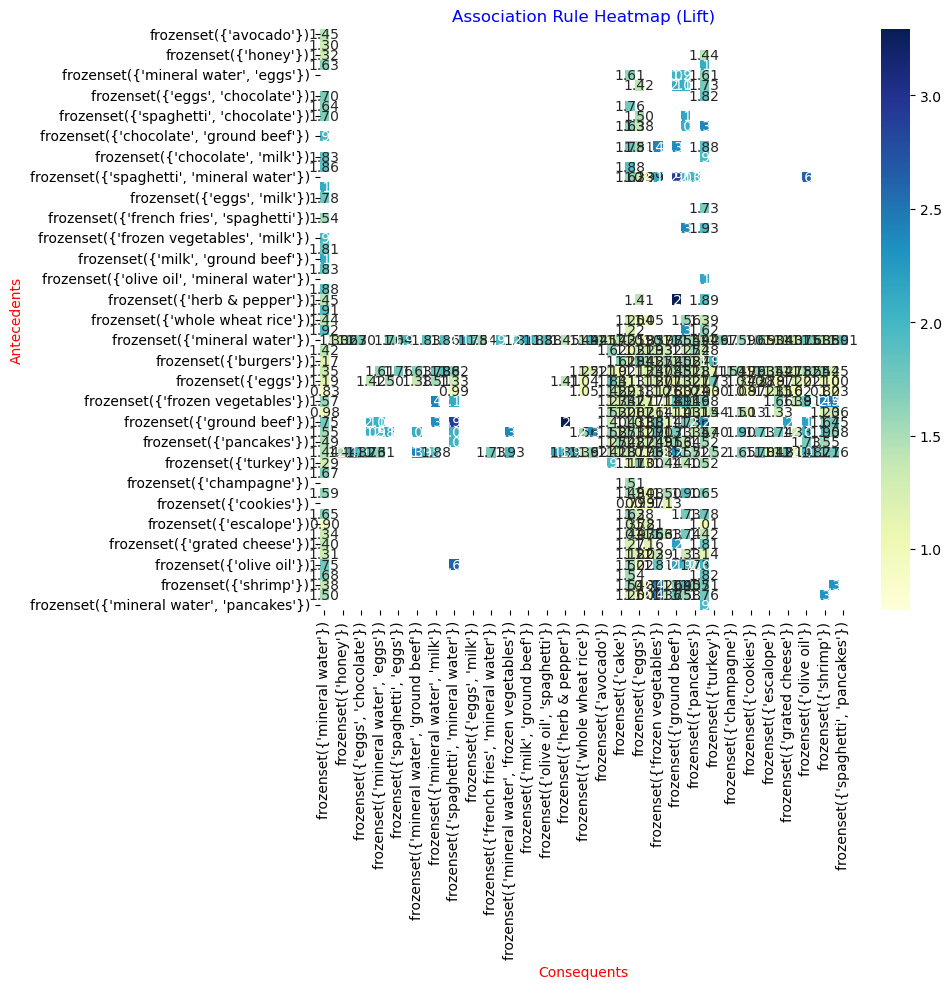

In [115]:
#Heatmap visualization for association rules using the seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
# Create a pivot table for the heatmap
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Association Rule Heatmap (Lift)',color='blue')
plt.xlabel('Consequents',color='red')
plt.ylabel('Antecedents',color='red')
plt.tight_layout()
plt.show()

#INTERVIEW QUESTIONS:

In [ ]:
#1.What is lift and why is it important in Association rules?

#Lift measures the strength of a rule by comparing its confidence to its expected confidence.

#Formula: Lift = (Confidence / (Support of consequent))

#Why is Lift Important?

#Identifies interesting rules Distinguishes between strong and weak rules

In [ ]:
#2.What is support and Confidence. How do you calculate them?

#Support: Support measures the frequency of a rule in the dataset. It represents the proportion of transactions in the dataset that contain the itemset.

#Confidence: Confidence measures the reliability of a rule. It represents the proportion of transactions that contain the consequent (right-hand side) among those that contain the antecedent (left-hand side).

#How to Calculate Support and Confidence:

#Let's consider a rule: A => B

#Support (sup): sup(A => B) = Number of transactions containing both A and B / Total number of transactions

#Confidence (conf): conf(A => B) = Number of transactions containing both A and B / Number of transactions containing A

In [ ]:
#3.What are some limitations or challenges of Association rules mining?

#Main Limitations and Challenges of Association Rules Mining:

#1. Handling Large Datasets: Association rules mining can be computationally expensive and may not be suitable for very large datasets.

#2. Noise and Missing Values: Noise and missing values in the data can lead to inaccurate or misleading rules.

#3. Overfitting: Generating too many rules can lead to overfitting, making it difficult to identify meaningful patterns.

#These three limitations are some of the most significant challenges in association rules mining, and addressing them is crucial to obtaining accurate and meaningful results